In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [24]:
img = plt.imread('/content/drive/MyDrive/CV/Sample.jpeg')

In [25]:
img_gray = cv2.cvtColor(img.astype('uint8'), cv2.COLOR_RGB2GRAY)

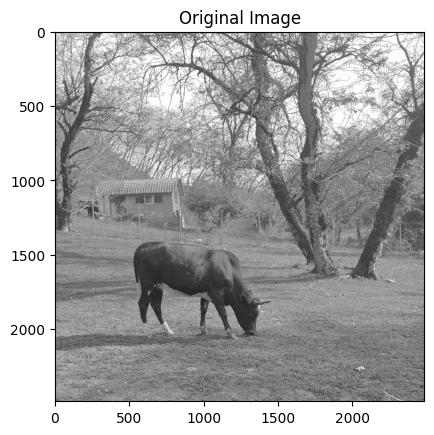

In [26]:
plt.imshow(img_gray, cmap=plt.cm.gray)
plt.title("Original Image")
plt.show()

## Part A

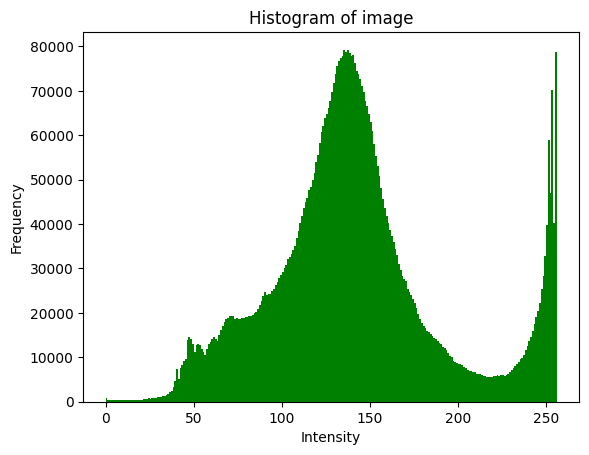

In [27]:
plt.hist(img_gray.ravel(), bins=256, range=(0, 256), color='green') # ravel() makes the pixels 1D
plt.title("Histogram of image")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.show()

## Part B

In [28]:
def hist_sliding(image, n, type_change):
  image = image.astype('int')
  image += n if type_change else -n
  image = np.clip(image, 0, 255).astype('uint8')
  return image

In [29]:
img_darker = hist_sliding(img_gray, 50, 0)

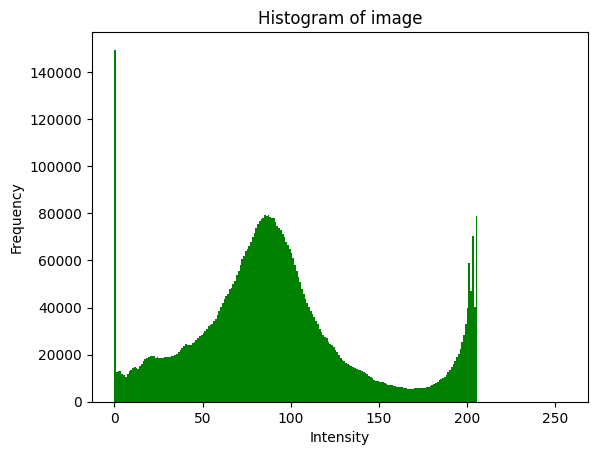

In [30]:
plt.hist(img_darker.ravel(), bins=256, range=(0, 256), color='green')
plt.title("Histogram of image")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.show()

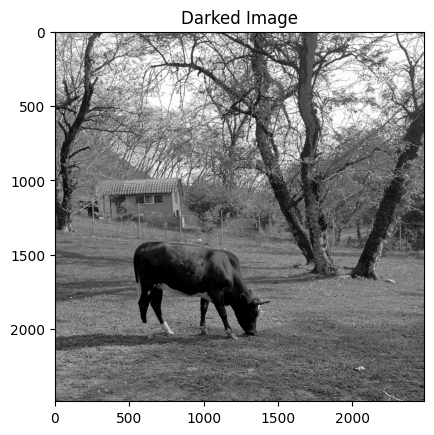

In [31]:
plt.imshow(img_darker, cmap=plt.cm.gray)
plt.title("Darked Image")
plt.show()

In [32]:
img_lighter = hist_sliding(img_gray, 50, 1)

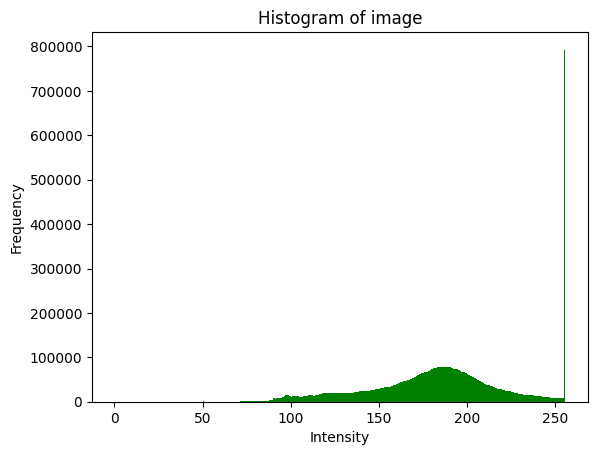

In [33]:
plt.hist(img_lighter.ravel(), bins=256, range=(0, 256), color='green')
plt.title("Histogram of image")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.show()

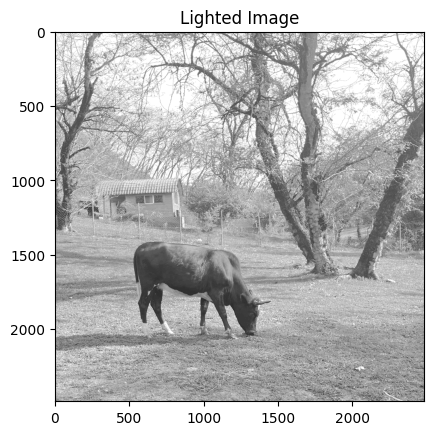

In [34]:
plt.imshow(img_lighter, cmap=plt.cm.gray)
plt.title("Lighted Image")
plt.show()

## Part C

In [36]:
hist, _ = np.histogram(img_gray.flatten(), bins=256, range=[0,256]) # get number of pixels per value of the color
cdf = hist.cumsum() # calculate CDF
cal_eq = (cdf * 255) / (cdf.max() - cdf.min()) # multiply to maximum value then divide to total number of pixels
eq_img = np.uint8(cal_eq[img_gray]) # convert to uint8

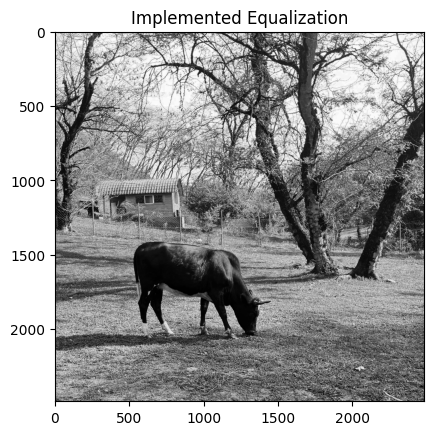

In [37]:
plt.imshow(eq_img, cmap=plt.cm.gray)
plt.title("Implemented Equalization")
plt.show()

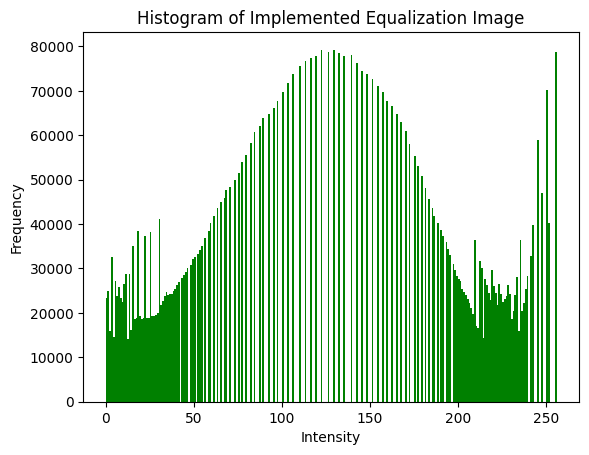

In [38]:
plt.hist(eq_img.ravel(), bins=256, range=(0, 256), color='green')
plt.title("Histogram of Implemented Equalization Image")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.show()

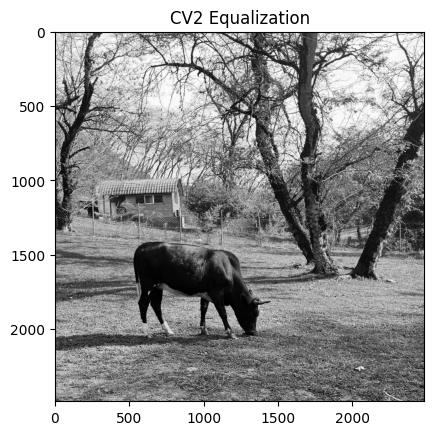

In [39]:
eq_img_cv2 = cv2.equalizeHist(img_gray)
plt.imshow(eq_img_cv2, cmap=plt.cm.gray)
plt.title("CV2 Equalization")
plt.show()

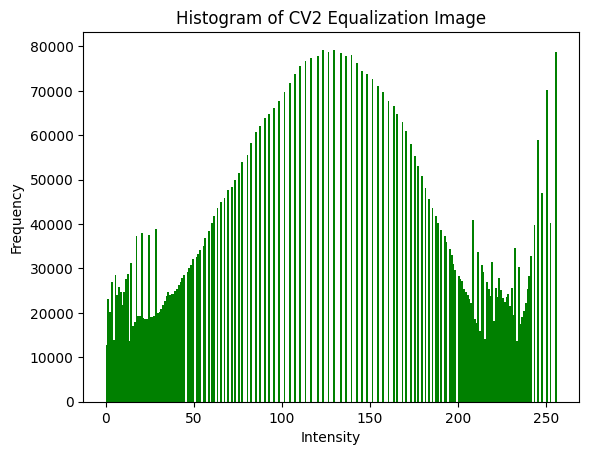

In [40]:
plt.hist(eq_img_cv2.ravel(), bins=256, range=(0, 256), color='green')
plt.title("Histogram of CV2 Equalization Image")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.show()